In [1]:
from Genome.goldstandard_pair.lls import *
gd = '/home/hermuba/data0118/goldstandard/gosim.smpl'
net = '/home/hermuba/data0118/mutual_info/blastp_out_max_evalue_pivot_new_ordinary40_mutual' #ID has problem
gold = read_gold(gd, colnames = ['gene_one', 'gene_two', 'gosim'])
all_chunks = read_net_by_chunk(net)
all_chunk = merge_net_with_all_chunks(gold,all_chunks, 'refseq')

processing 100 chunk
processing 200 chunk
processing 300 chunk
processing 400 chunk
processing 500 chunk
processing 600 chunk
processing 700 chunk
processing 800 chunk
processing 900 chunk
processing 1000 chunk
processing 1100 chunk
processing 1200 chunk
processing 1300 chunk
processing 1400 chunk
processing 1500 chunk
processing 1600 chunk
processing 1700 chunk
processing 1800 chunk
processing 1900 chunk
processing 2000 chunk
processing 2100 chunk
processing 2200 chunk
processing 2300 chunk
processing 2400 chunk
processing 2500 chunk
processing 2600 chunk
processing 2700 chunk
processing 2800 chunk
processing 2900 chunk
processing 3000 chunk
processing 3100 chunk
processing 3200 chunk
processing 3300 chunk
processing 3400 chunk
processing 3500 chunk
processing 3600 chunk
processing 3700 chunk
processing 3800 chunk
processing 3900 chunk
processing 4000 chunk
processing 4100 chunk


In [2]:
all_chunk.head()

,gene_one,gene_two,gosim,mutual_info,nrm_mutual
0,562.10576.con.0001_191|562.10576,562.22513.con.0018_72|562.22513,0.111,0.000939,0.006016
1,562.10576.con.0002_214|562.10576,562.22547.con.0052_10|562.22547,0.000,0.396163,0.315531
2,562.10576.con.0002_294|562.10576,562.22453.con.0113_2|562.22453,1.000,0.031609,0.044786
3,562.10576.con.0002_294|562.10576,562.22496.con.0090_9|562.22496,0.000,0.028451,0.050343
4,562.10576.con.0003_130|562.10576,562.10576.con.0005_117|562.10576,0.243,0.004453,0.057668


In [3]:
all_chunk.to_csv('~/data0118/joined_smpl/refseq_GOsim_rm_plasmid', index = False)

Text(0.5, 0.98, 'RefSeqNet v.s. GO term semantic similarity score')

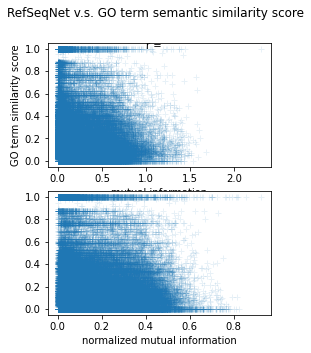

In [4]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2,1, sharey = True, figsize = (4,5))
ax[0].plot(all_chunk['mutual_info'], all_chunk['gosim'], '+', alpha = 0.1)
ax[0].set_xlabel('mutual information')
ax[0].set_ylabel('GO term similarity score')
ax[0].text(1,1,'r = ')
ax[1].plot(all_chunk['nrm_mutual'], all_chunk['gosim'], '+' ,  alpha = 0.1)
ax[1].set_xlabel('normalized mutual information')
plt.suptitle('RefSeqNet v.s. GO term semantic similarity score')


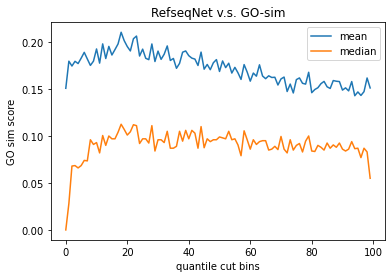

In [5]:
score = 'nrm_mutual'
all_chunk['cut_mutual'] = pd.qcut(all_chunk[score],  q = 100, duplicates = 'drop', labels = False)
grouped_mean = all_chunk.groupby(by = ['cut_mutual'])['gosim'].mean()
grouped_median = all_chunk.groupby(by = ['cut_mutual'])['gosim'].median()

grouped_mean.plot(label = 'mean')
grouped_median.plot(label = 'median')
plt.title('RefseqNet v.s. GO-sim')
plt.ylabel('GO sim score')
plt.xlabel('quantile cut bins')
plt.legend()